<a href="https://colab.research.google.com/github/aworklab/everydayPython/blob/main/ex_20220606.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 오늘의 목표
* Regressor
* Customer Analysis

In [4]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotnine as gg
from plotnine import ggplot, aes
import os

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.impute import KNNImputer
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.metrics import roc_curve, roc_auc_score, accuracy_score, f1_score, mean_squared_error
import sklearn.datasets as skd

# Regressor

In [44]:
raw1 = skd.load_wine()
raw1.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names'])

In [45]:
x = pd.DataFrame(raw1['data'], columns = raw1['feature_names'])
y = raw1['target']

In [9]:
x.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


In [10]:
x.shape

(178, 13)

In [11]:
x_tr, x_te, y_tr, y_te = train_test_split(x, y, train_size = .7)

In [18]:
scaler = StandardScaler()
x_tr_std = scaler.fit_transform(x_tr)
x_te_std = scaler.transform(x_te)

In [25]:
fit_rf = RandomForestClassifier().fit(x_tr_std, y_tr)
pred_rf = fit_rf.predict(x_te_std)
proba_rf = fit_rf.predict_proba(x_te_std)[:,-1]

In [24]:
accuracy_score(y_te, pred_rf)

0.9814814814814815

In [37]:
tpr, fpr, threshold = roc_curve(pd.get_dummies(pd.DataFrame(y_te, columns = ['target']), 
                         columns = ['target']).iloc[:,-1], 
                         proba_rf)

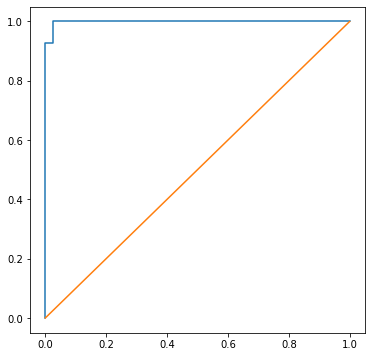

In [40]:
plt.figure(figsize = [6,6])
plt.plot(tpr, fpr)
plt.plot([0,1], [0,1])

In [46]:
pca = PCA(n_components = 10)

In [48]:
x_ = scaler.fit_transform(x)

In [56]:
fit_pca = pca.fit_transform(x_)

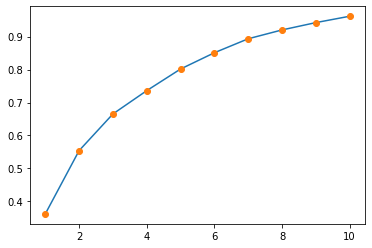

In [54]:
plt.plot(np.arange(1,11), fit_pca.explained_variance_ratio_.cumsum())
plt.plot(np.arange(1,11), fit_pca.explained_variance_ratio_.cumsum(), 'o')

In [65]:
res_pca = pd.DataFrame(np.c_[fit_pca, y.reshape(-1,1)], 
                       columns = [f'pc{a:02d}' for a in range(1, 11)] + ['target'])
res_pca['target'] = res_pca['target'].astype(int).astype(str)

In [66]:
res_pca.head()

,pc01,pc02,pc03,pc04,pc05,pc06,pc07,pc08,pc09,pc10,target
0,3.316751,-1.443463,-0.165739,-0.215631,0.693043,-0.223880,0.596427,0.065139,0.641443,1.020956,0
1,2.209465,0.333393,-2.026457,-0.291358,-0.257655,-0.927120,0.053776,1.024416,-0.308847,0.159701,0
2,2.516740,-1.031151,0.982819,0.724902,-0.251033,0.549276,0.424205,-0.344216,-1.177834,0.113361,0
3,3.757066,-2.756372,-0.176192,0.567983,-0.311842,0.114431,-0.383337,0.643593,0.052544,0.239413,0
4,1.008908,-0.869831,2.026688,-0.409766,0.298458,-0.406520,0.444074,0.416700,0.326819,-0.078366,0


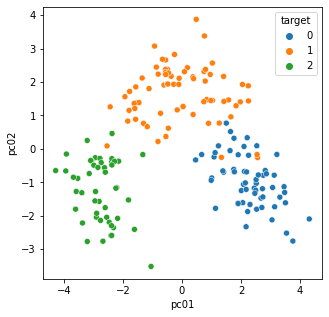

In [67]:
plt.figure(figsize = [5,5])
sns.scatterplot(data = res_pca, x = 'pc01', y = 'pc02', hue = 'target')

# Customer Analysis

In [41]:
os.listdir()

['.config',
 'online_retail_II.xlsx',
 'rfm_test.csv',
 'KPMG_VI_New_raw_data_update_final.xlsx',
 'retail_data_transactions.csv',
 'retail_data_response.csv',
 'ecommerce-data.csv',
 'sample_data']

In [42]:
raw = pd.read_excel('online_retail_II.xlsx')

In [68]:
raw.columns = [a.lower() for a in raw.columns]
raw.head()

,invoice,stockcode,description,quantity,invoicedate,price,customer id,country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


In [74]:
raw = raw[raw.country == 'United Kingdom']
raw.head()

,invoice,stockcode,description,quantity,invoicedate,price,customer id,country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


In [75]:
raw['invoicedate'] = pd.to_datetime(raw['invoicedate'])
raw.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,invoice,stockcode,description,quantity,invoicedate,price,customer id,country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


In [76]:
raw['rev'] = raw['quantity'] * raw['price'] 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [81]:
raw = raw[['customer id', 'invoicedate', 'rev']]
raw.columns = ['id', 'date', 'rev']
raw.head()

,id,date,rev
0,13085.0,2009-12-01 07:45:00,83.4
1,13085.0,2009-12-01 07:45:00,81.0
2,13085.0,2009-12-01 07:45:00,81.0
3,13085.0,2009-12-01 07:45:00,100.8
4,13085.0,2009-12-01 07:45:00,30.0


In [85]:
raw = raw.sort_values(['id', 'date'], ascending = [0, 0])
raw['month'] = raw['date'].to_numpy().astype('datetime64[M]')
raw.head()

,id,date,rev,month
478760,18287.0,2010-11-22 11:51:00,27.60,2010-11-01
478761,18287.0,2010-11-22 11:51:00,15.00,2010-11-01
478762,18287.0,2010-11-22 11:51:00,14.85,2010-11-01
478763,18287.0,2010-11-22 11:51:00,14.85,2010-11-01
478764,18287.0,2010-11-22 11:51:00,25.20,2010-11-01


In [86]:
list_pu = raw.groupby(['id', 'month']).first().reset_index()
list_npu = raw.groupby(['id', 'month']).first().reset_index()

In [90]:
list_month = list_pu['month'].sort_values().unique()

In [140]:
for mon in list_month : 

  temp_npu = list_npu[list_npu['month'] == mon]
  temp_pu = list_pu[list_pu['id'].isin(temp_npu['id'])]
  temp = temp_pu.groupby(['month'])['id'].count().reset_index()
  temp = temp.assign(num = temp.agg({'month':'rank'}))
  temp['npu_month'] = mon
  temp = temp[['npu_month', 'num', 'id']].rename(columns = {'id' : 'pu'})
  temp['num'] = [f'm{a:02d}' for a in temp['num'].astype(int)]

  temp = pd.pivot_table(temp, index = 'npu_month', columns = 'num', values = 'pu').reset_index()
  temp.columns.name = None 

  if mon == list_month[0] :

    res = temp

  else : 

    res = pd.concat([res, temp], axis = 0)

In [141]:
res.head()

,npu_month,m01,m02,m03,m04,m05,m06,m07,m08,m09,m10,m11,m12,m13
0,2009-12-01,986,368,334,418,387,386,380,350,335,363,423,487,243
0,2010-01-01,368,719,284,338,319,310,310,296,273,292,331,341,173
0,2010-02-01,334,284,748,336,313,347,323,293,276,316,324,344,166
0,2010-03-01,418,338,336,1033,408,446,426,399,370,409,460,481,221
0,2010-04-01,387,319,313,408,926,400,408,388,363,394,432,436,204


In [145]:
res = pd.melt(res, id_vars = 'npu_month', var_name = 'month', value_name = 'pu')
res.head()

,npu_month,month,pu
0,2009-12-01,m01,986
1,2010-01-01,m01,368
2,2010-02-01,m01,334
3,2010-03-01,m01,418
4,2010-04-01,m01,387


In [146]:
res = res.assign(ratio = res.groupby(['npu_month'])['pu'].apply(lambda x : x/x.max()))
res.head()

,npu_month,month,pu,ratio
0,2009-12-01,m01,986,1.000000
1,2010-01-01,m01,368,0.511822
2,2010-02-01,m01,334,0.446524
3,2010-03-01,m01,418,0.404647
4,2010-04-01,m01,387,0.417927


In [148]:
pd.pivot_table(res, index = 'npu_month', columns = 'month', values = ['ratio'])

ratio                                                    \
month            m01       m02       m03       m04       m05       m06   
npu_month                                                                
2009-12-01  1.000000  0.373225  0.338742  0.423935  0.392495  0.391481   
2010-01-01  0.511822  1.000000  0.394993  0.470097  0.443672  0.431154   
2010-02-01  0.446524  0.379679  1.000000  0.449198  0.418449  0.463904   
2010-03-01  0.404647  0.327202  0.325266  1.000000  0.394966  0.431752   
2010-04-01  0.417927  0.344492  0.338013  0.440605  1.000000  0.431965   
2010-05-01  0.389113  0.312500  0.349798  0.449597  0.403226  1.000000   
2010-06-01  0.373281  0.304519  0.317289  0.418468  0.400786  0.404715   
2010-07-01  0.385888  0.326351  0.323043  0.439912  0.427784  0.454245   
2010-08-01  0.373051  0.304009  0.307350  0.412027  0.404232  0.428731   
2010-09-01  0.330902  0.266180  0.288058  0.372835  0.359161  0.384686   
2010-10-01  0.292531  0.228907  0.224066  0.318119  0.298755  0.314661   
2010-11-01  0.314396  0.220142  0.222079  0.310523  0.281472  0.306004   
2010-12-01  0.423345  0.301394  0.289199  0.385017  0.355401  0.379791   

                                                                        \
month            m07       m08       m09       m10       m11       m12   
npu_month                                                                
2009-12-01  0.385396  0.354970  0.339757  0.368154  0.429006  0.493915   
2010-01-01  0.431154  0.411683  0.379694  0.406120  0.460362  0.474270   
2010-02-01  0.431818  0.391711  0.368984  0.422460  0.433155  0.459893   
2010-03-01  0.412391  0.386254  0.358180  0.395934  0.445305  0.465634   
2010-04-01  0.440605  0.419006  0.392009  0.425486  0.466523  0.470842   
2010-05-01  0.415323  0.415323  0.388105  0.425403  0.458669  0.477823   
2010-06-01  1.000000  0.411591  0.406680  0.444990  0.473477  0.500000   
2010-07-01  0.461963  1.000000  0.431092  0.468578  0.488423  0.534730   
2010-08-01  0.461024  0.435412  1.000000  0.445434  0.489978  0.504454   
2010-09-01  0.412944  0.387420  0.364631  1.000000  0.454877  0.496809   
2010-10-01  0.333333  0.306362  0.304288  0.345090  1.000000  0.472337   
2010-11-01  0.328599  0.313105  0.292447  0.351840  0.440930  1.000000   
2010-12-01  0.379791  0.411150  0.390244  0.444251  0.555749  0.646341   

                      
month            m13  
npu_month             
2009-12-01  0.246450  
2010-01-01  0.240612  
2010-02-01  0.221925  
2010-03-01  0.213940  
2010-04-01  0.220302  
2010-05-01  0.219758  
2010-06-01  0.214145  
2010-07-01  0.260198  
2010-08-01  0.249443  
2010-09-01  0.232452  
2010-10-01  0.220609  
2010-11-01  0.239509  
2010-12-01  1.000000

/usr/local/lib/python3.7/dist-packages/plotnine/utils.py:1246: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if pdtypes.is_categorical(arr):


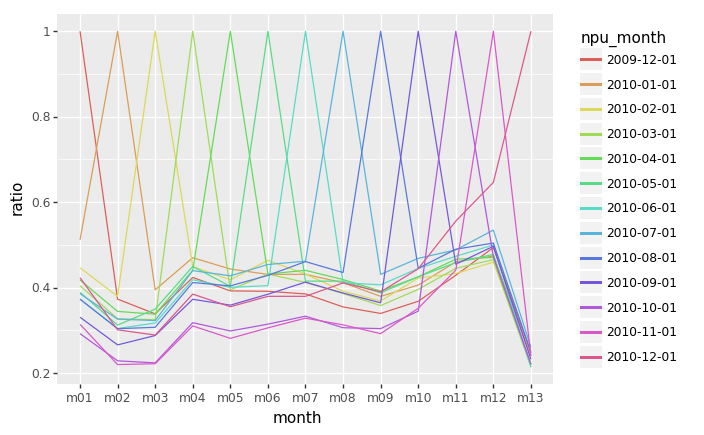

<ggplot: (8756982808089)>

In [150]:
(
    ggplot(res.assign(npu_month = res.npu_month.astype('str')), 
           aes('month', 'ratio', color = 'npu_month', group = 'npu_month')) +
    gg.geom_line()
)

,npu_month,m01,m02,m03,m04,m05,m06,m07,m08,m09,m10,m11,m12,m13
0,2009-12-01,986,368,334,418,387,386,380,350,335,363,423,487,243
